In [ ]:
IDENTIFIER = "beethoven-op67"
NUM = 3

import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

from dwave.system import DWaveSampler, FixedEmbeddingComposite

from plots import plotHistogram, plotEnergyGaps
from qubo import createBQM

picklePath = f"../Pickles/{IDENTIFIER}/{IDENTIFIER}_"
numPath = f"../Pickles/{IDENTIFIER}/{NUM}/{IDENTIFIER}_{NUM}_"
dataPath = f"../Data/{IDENTIFIER}/{NUM}/{IDENTIFIER}_{NUM}_"

phrases = pd.read_csv(picklePath + "phrases.csv", index_col=[0,1])
G = nx.read_graphml(picklePath + "graph.graphml")
instruments = json.load(open(numPath + "instruments.json"))
embedding = json.load(open(numPath + "embedding.json", "r"))
sampler = FixedEmbeddingComposite(DWaveSampler(), embedding)

In [7]:
bqm = createBQM(G, phrases, instruments, 6, 12, 1)
r = 2000
cs = 30
at = 200
sampleset = sampler.sample(bqm, num_reads=r, chain_strength=cs, annealing_time=at, label=f"{IDENTIFIER}_{r}_{cs}_{at}us")
sampleset.to_pandas_dataframe(True).to_csv(dataPath + "sampleset.csv")

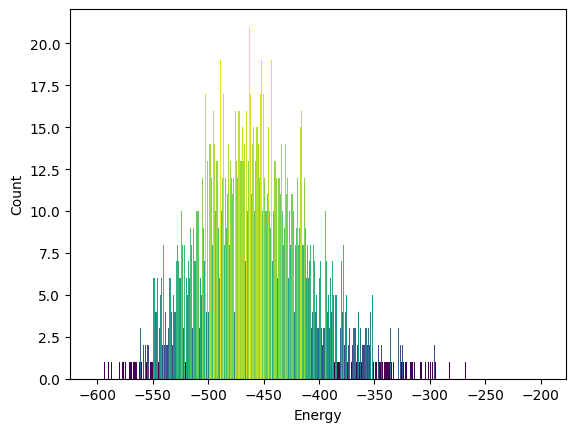

197.85090062126608 11.168809645257767


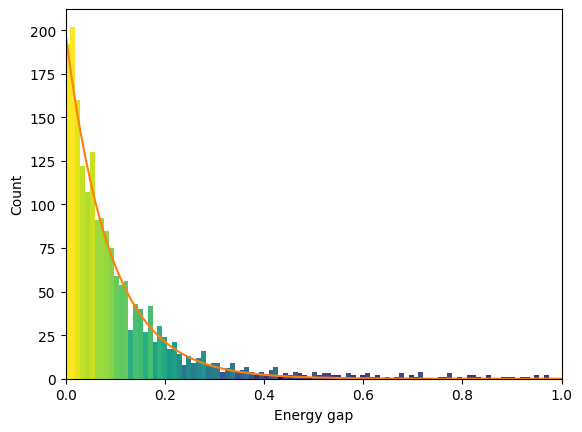

In [ ]:
df = pd.read_csv(dataPath + "sampleset.csv")

plotHistogram(df)
plt.show()
plotEnergyGaps(df)
plt.show()